First we will load a 100 images to test the preprocessing speed

In [88]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage
import glob 
import os 
import random
import numpy as np
import pandas as pd
from PIL import ImageFile
from sklearn.model_selection import train_test_split

#what is the role of truncated images?
ImageFile.LOAD_TRUNCATED_IMAGES = True



In [89]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, Sequential, models
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications import efficientnet, vgg16

The preprocessing below works. It has been commented out to replace it with a better one. 

In [90]:
def preprocess_image(image):
    resized = cv.resize(image,(300,300),interpolation = cv.INTER_AREA)
    img = cv.medianBlur(resized,5)
    ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,15,2)
    images = [th1, th2, th3, img]

    
    return images
    

In [91]:
def preprocess_image_improved(image,reshape_size):
    if image.shape == (570, 1015, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[250:-100,100:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold(resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    elif image.shape == (582, 1034, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[60:500,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    elif image.shape == (624, 1200, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[150:,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,100,100)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    #EL PORTO IMAGES FOR GOOD ARE FAILING SYSTEMATICALLY
    elif image.shape == (624, 1110, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        #changed this to -100 instead of -170 for debugging
        cropped = image[350:-100,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,250)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,9,5)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
    
    WE HAVE THROWN ALL OF THOSE IN HERE FOR NOW  
    else:
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[150:,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,100,100)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        
        return images


In [92]:
test_improved = plt.imread("/Users/nicolasmartinez-geijovila/code/IamjustNick/wavewatcher/raw_data/Flat/NigranBee__ocean__2022-11-28_16:33:30__175.png")

In [93]:
cool = preprocess_image_improved(test_improved,300)

In [85]:
# test_image = plt.imread("/Users/nicolasmartinez-geijovila/code/IamjustNick/wavewatcher/raw_data/Chaotic/HawaiBee__ocean__2022-11-24_18:07:10__2.png")

# y = preprocess_image(test_image,300)

In [94]:
X = []
y = []
idx = 0


for root , dirs , files in os.walk("raw_data"):
    if dirs:
        parent = root
        folders = dirs
        print(folders)

    if files:
        print(f"Preprocessing folder {folders[idx]}...")
        failed = [] 
        for file in np.random.choice(np.array(files),len(files), replace = False):
            try:
                original_image = plt.imread(os.path.join(parent , folders[idx], file))
                
                     
                processed_image = preprocess_image_improved(original_image,300)
                
                if len(processed_image) < 2:
                    print(f"problemita in {os.path.join(parent , folders[idx], file)}")
                else:
                    X.append(np.array(processed_image).T)
                    y.append(idx)
                #The print below was just to check the value for each situation
                #print(idx)
            
            except Exception as e:
                 print("Detected bad image!")
                 failed.append(os.path.join(parent , folders[idx], file))
                 continue
        
        idx += 1
        
X = np.array(X)
y = np.array(y)
X.shape , y.shape

['Flat', 'Chaotic', 'Good']
Preprocessing folder Flat...
Preprocessing folder Chaotic...
Preprocessing folder Good...


((522, 300, 300, 8), (522,))

In [87]:

plt.imshow(plt.imread(failed[0]))

a =preprocess_image_improved(plt.imread(failed[0]),300)

IndexError: list index out of range

In [81]:
print(a)

None


In [31]:
# j = 0

# for i in range(522):
#     if (X[i]).shape != (300,300,8):
#         print (X[i].shape)
#         j += 1
# print(j)

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
88


In [9]:
len(X)

434

The code below is a clue from Nicole about what can we do to fix X shape.

In [ ]:
#np.append( np.array([[1,2,3],[3,4,5]]) , np.array([[1,2,3],[2,3,4]]) ,axis = 0).reshape(2,2,3)

array([[[1, 2, 3],
        [3, 4, 5]],

       [[1, 2, 3],
        [2, 3, 4]]])

: 

: 

: 

In [ ]:
X.shape

(524,)

: 

: 

: 

Let's augment the little data we have. Considering the nature of the data heavy rotations are not advised.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    #I added brightness changes, I think they are relevant to our task
    brightness_range =(0.5,1)
    ) 

: 

: 

: 

: 

: 

: 

In [95]:
# INPUT_SHAPE = (4, 250, 250)
NUMBER_CLASSES = 3

In [96]:
X.shape
y_cat = to_categorical(y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30)

The model below works with the first preprocessing, there seem to be some serious issues when trying to apply any kind of max pooling though.

In [98]:
def initialize_basic():
    #Create an empty template
    model = models.Sequential()
    
    model.add(layers.Conv2D(64, (3,3), input_shape= (300,300,8), padding='same', activation="relu"))
    
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(3, activation = "softmax"))
    return model


In [99]:
def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model

In [100]:
test_model = initialize_basic()

In [101]:
compile_model(test_model)


In [102]:
es = EarlyStopping(patience = 3,restore_best_weights= True)
test_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64
5/5 [==============================] - 13s 2s/step - loss: 5.2667 - accuracy: 0.3493 - val_loss: 2.4895 - val_accuracy: 0.3973
Epoch 2/64
5/5 [==============================] - 12s 2s/step - loss: 2.1012 - accuracy: 0.5000 - val_loss: 1.0294 - val_accuracy: 0.5616
Epoch 3/64
5/5 [==============================] - 11s 2s/step - loss: 1.2509 - accuracy: 0.5719 - val_loss: 1.8542 - val_accuracy: 0.4932
Epoch 4/64
5/5 [==============================] - 13s 2s/step - loss: 0.9940 - accuracy: 0.6541 - val_loss: 0.9452 - val_accuracy: 0.5890
Epoch 5/64
5/5 [==============================] - 11s 2s/step - loss: 0.7530 - accuracy: 0.6986 - val_loss: 1.2769 - val_accuracy: 0.5479
Epoch 6/64
5/5 [==============================] - 11s 2s/step - loss: 0.6233 - accuracy: 0.7329 - val_loss: 0.7644 - val_accuracy: 0.6027
Epoch 7/64
5/5 [==============================] - 11s 2s/step - loss: 0.4854 - accuracy: 0.8048 - val_loss: 0.9566 - val_accuracy: 0.5753
Epoch 8/64
5/5 [==================

In [103]:
test_model.evaluate(X_test,y_test)

5/5 [==============================] - 1s 218ms/step - loss: 0.8632 - accuracy: 0.6306


[0.8631781339645386, 0.6305732727050781]

In [ ]:
def initialize_improved():
    #Create an empty template
    model = models.Sequential()
    
    model.add(layers.Conv2D(64, (3,3), input_shape= (4,300,300), padding='same', activation="relu"))
    #Max pooling layers have been creating some problems. I am playing with the padding argument to solve the dimensions issue.
    #model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    model.add(layers.MaxPool2D(pool_size=(2,2),padding="valid"))
    #Second convolutional layer 
    model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    
    model.add(layers.Flatten())
    
    #Deep learning layers
    #model.add(layers.Dense(64, activation = "relu"))
    #model.add(layers.Dense(32, activation = "relu"))
    model.add(layers.Dense(300, activation = "relu"))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(3, activation = "softmax"))
    return model

def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model


: 

: 

: 

In [ ]:
improved_model = initialize_improved()
compile_model(improved_model)

: 

: 

: 

In [ ]:
es = EarlyStopping(patience = 3,restore_best_weights= True)
improved_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64
5/5 [==============================] - 2s 304ms/step - loss: 1.1605 - accuracy: 0.3390 - val_loss: 1.0945 - val_accuracy: 0.4189
Epoch 2/64
5/5 [==============================] - 1s 256ms/step - loss: 1.0978 - accuracy: 0.3527 - val_loss: 1.1019 - val_accuracy: 0.4189
Epoch 3/64
5/5 [==============================] - 1s 262ms/step - loss: 1.0681 - accuracy: 0.4486 - val_loss: 1.0804 - val_accuracy: 0.3784
Epoch 4/64
5/5 [==============================] - 1s 255ms/step - loss: 1.0124 - accuracy: 0.5240 - val_loss: 1.1022 - val_accuracy: 0.4324
Epoch 5/64
5/5 [==============================] - 1s 255ms/step - loss: 0.9834 - accuracy: 0.5342 - val_loss: 1.0588 - val_accuracy: 0.4730
Epoch 6/64
5/5 [==============================] - 1s 266ms/step - loss: 0.9312 - accuracy: 0.6027 - val_loss: 1.0535 - val_accuracy: 0.4459
Epoch 7/64
5/5 [==============================] - 1s 290ms/step - loss: 0.8904 - accuracy: 0.6267 - val_loss: 1.0337 - val_accuracy: 0.4730
Epoch 8/64
5/5 [====

: 

: 

: 

In [ ]:
improved_model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 49ms/step - loss: 0.8050 - accuracy: 0.6266


[0.8050152063369751, 0.6265822649002075]

: 

: 

: 

In [150]:
test_image  = plt.imread("test_images/test_5.png")


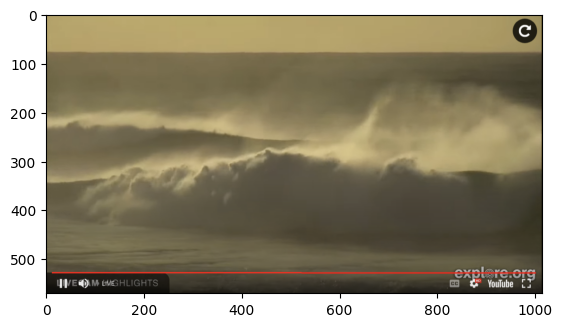

In [151]:
plt.imshow(test_image)

In [136]:
test_image.shape

(972, 1892, 4)

In [152]:
test_image = preprocess_image_improved(test_image,300)


In [146]:
test_image.shape

AttributeError: 'list' object has no attribute 'shape'

In [153]:
test_image = np.array([(test_image)])

In [140]:
test_image.shape

(1, 8, 300, 300)

In [154]:
test_image = test_image.reshape(1,300,300,8)

In [155]:
test_model.predict(test_image)

1/1 [==============================] - 0s 120ms/step


array([[0.03066211, 0.67019755, 0.2991403 ]], dtype=float32)

In [157]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
improved_model.predict(test_image)

1/1 [==============================] - 0s 14ms/step


array([[0.01975967, 0.9450792 , 0.03516113]], dtype=float32)

: 

: 

: 